**Loading packages**

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

**Loading Data**

In [2]:
train = pd.read_csv("../input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("../input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
gender = pd.read_csv("../input/titanic/gender_submission.csv")
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
print("Size of training set",format(train.shape))
print("Size of testing set",format(test.shape))
print("Size of submission set",format(gender.shape))

Size of training set (891, 12)
Size of testing set (418, 11)
Size of submission set (418, 2)


**Exploratory Data Analysis**

Comparison of gender and survived. It shows that 74% of female survived and 18% of male is survived

Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815


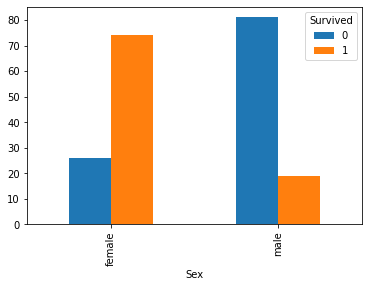

In [6]:
pd.crosstab(train['Sex'],train['Survived']).apply(lambda r: 100*r/r.sum(), axis=1).plot.bar()

print(pd.crosstab(train['Sex'],train['Survived']).apply(lambda r: 100*r/r.sum(), axis=1))

Comparison of Passenger class and survived. It shows that 1st class passenger survived more than other class

Survived          0          1
Pclass                        
1         37.037037  62.962963
2         52.717391  47.282609
3         75.763747  24.236253


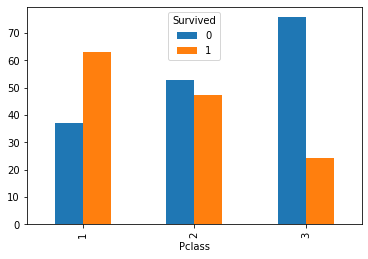

In [7]:
pd.crosstab(train['Pclass'],train['Survived']).apply(lambda r: 100*r/r.sum(), axis=1).plot.bar()

print(pd.crosstab(train['Pclass'],train['Survived']).apply(lambda r: 100*r/r.sum(), axis=1))

Survived          0          1
Embarked                      
C         44.642857  55.357143
Q         61.038961  38.961039
S         66.304348  33.695652


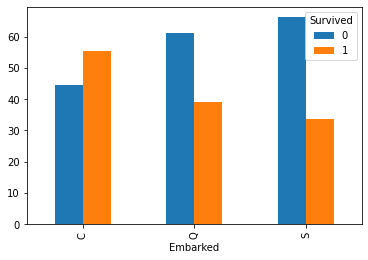

In [8]:
pd.crosstab(train['Embarked'],train['Survived']).apply(lambda r: 100*r/r.sum(), axis=1).plot.bar()

print(pd.crosstab(train['Embarked'],train['Survived']).apply(lambda r: 100*r/r.sum(), axis=1))

Comparison of gender and embarked against survival.

In [10]:
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']

Survived      False      True 
Embarked                      
C         12.328767  87.671233
Q         25.000000  75.000000
S         31.034483  68.965517


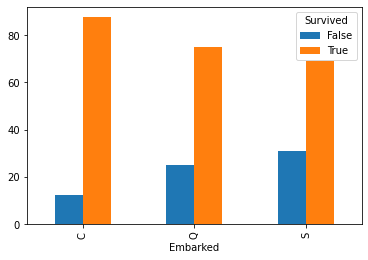

In [11]:
pd.crosstab(train['Embarked'],women['Survived']==1).apply(lambda r: 100*r/r.sum(), axis=1).plot.bar()

print(pd.crosstab(train['Embarked'],women['Survived']==1).apply(lambda r: 100*r/r.sum(), axis=1))

Survived      False      True 
Embarked                      
C         69.473684  30.526316
Q         92.682927   7.317073
S         82.539683  17.460317


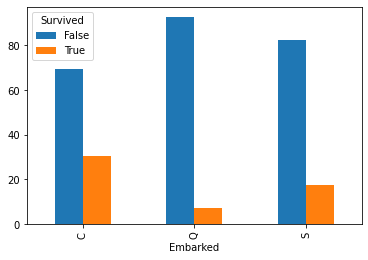

In [12]:
pd.crosstab(train['Embarked'],men['Survived']==1).apply(lambda r: 100*r/r.sum(), axis=1).plot.bar()

print(pd.crosstab(train['Embarked'],men['Survived']==1).apply(lambda r: 100*r/r.sum(), axis=1))

In [13]:
print("Female and 1st class",train.apply(lambda x: x.Sex=='female' and x.Pclass ==1 and x.Survived==1, axis =1).sum())
print("Female and 2nd class",train.apply(lambda x: x.Sex=='female' and x.Pclass ==2 and x.Survived==1, axis =1).sum())
print("Female and 3rd class",train.apply(lambda x: x.Sex=='female' and x.Pclass ==3 and x.Survived==1, axis =1).sum())

Female and 1st class 91
Female and 2nd class 70
Female and 3rd class 72


In [14]:
print("Male and 1st class",train.apply(lambda x: x.Sex=='male' and x.Pclass ==1 and x.Survived==1, axis =1).sum())
print("Male and 2nd class",train.apply(lambda x: x.Sex=='male' and x.Pclass ==2 and x.Survived==1, axis =1).sum())
print("Male and 3rd class",train.apply(lambda x: x.Sex=='male' and x.Pclass ==3 and x.Survived==1, axis =1).sum())

Male and 1st class 45
Male and 2nd class 17
Male and 3rd class 47


**Data cleaning**

In [15]:
#Shows the number of NULL values present in each columns
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
train1=train.copy()
test1=test.copy()

In [17]:
train1 = train1.fillna(-999)
test1 = test1.fillna(-999)

In [18]:
train1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [19]:
train1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
#Create dummy variables for categorical columns
cat_cols=['Sex','Embarked']
for col in cat_cols:
    train1=train1.join(pd.get_dummies(train1[col],drop_first=True))
train1.drop(cat_cols,axis=1,inplace=True)

for col in cat_cols:
    test1=test1.join(pd.get_dummies(test1[col],drop_first=True))
test1.drop(cat_cols,axis=1,inplace=True)

In [21]:
train1.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin','SibSp','Parch'],axis=1,inplace=True)

test1.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin','SibSp','Parch'],axis=1,inplace=True)


In [22]:
train1.head()

,Survived,Pclass,Age,male,C,Q,S
0,0,3,22.0,1,0,0,1
1,1,1,38.0,0,1,0,0
2,1,3,26.0,0,0,0,1
3,1,1,35.0,0,0,0,1
4,0,3,35.0,1,0,0,1


In [23]:
target = train1['Survived']
train1.drop(['Survived'],axis=1,inplace=True)

**Modeling**

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(train1,target, test_size=0.2, random_state=0)
gnb = GaussianNB()
clf = gnb.fit(X_train, y_train)
#y_pred= clf.predict(X_test)
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

0.7988826815642458
0.773876404494382


In [25]:
from sklearn import preprocessing
import xgboost as xgb

print("XGBoost version:", xgb.__version__)

XGBoost version: 1.2.1


In [31]:
clf = xgb.XGBClassifier(
    n_estimators=1000,
    max_depth=11,
    learning_rate=0.001,
    subsample=0.9,
    colsample_bytree=0.7,
    missing=-999,
    random_state=2020
)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

0.8547486033519553
0.851123595505618
